# Spike Response curve for Figure 6C

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.extractors as sse
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw
import xarray as xr

/home/laurendiaz/miniconda3/envs/oipls/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/laurendiaz/miniconda3/envs/oipls/lib/python3.10/site-packages/tridesclous/numba_tools.py:11: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True)
/home/laurendiaz/miniconda3/envs/oipls/lib/python3.10/site-packages/tridesclous/numba_tools.py:33: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argum

In [3]:
viridis = mpl.colormaps['viridis']
mpl.rcParams.update({'font.size': 15})

In [4]:
def pull_spike_data(fpath, recording, nwbfile, unit, bandpass = True, freqmin = 300, freqmax = 6000, artifact = 10):
    '''
    This function pulls and returns the max amplitude 
    and spike times for a given recording
    
    Parameters
    fpath (string)   : the  path to the folder containing your 
                       waveforms folder and .npy file (if current  
                       folder, input '.')
    unit (int)       : the unit you would like to analyze
    nwbfile (string) : the path to the nwb file with
                     raw recording 

    Return
    spike_amps (array):  1D array of spike amplitudes for given unit
    spike_times (array): 1D array of spike times for given unit
    '''
    # get raw recording data
    nwb_rec = se.read_nwb(fpath+'NWBFiles/'+nwbfile, electrical_series_name='ES')
    nwb_stim = se.read_nwb(fpath+'NWBFiles/'+nwbfile, electrical_series_name='ES_STIM')
    #rec_data = pd.DataFrame(nwb_rec.get_traces())
    if(bandpass):
        nwb_rec_filtered = spre.bandpass_filter(nwb_rec, freq_min=freqmin, freq_max=freqmax)
        nwb_rec_preprocessed = spre.whiten(nwb_rec_filtered, dtype='float32')
        channel = nwb_rec_preprocessed.get_traces()[:,0]
        stimulation_trigger_frames = np.where(np.abs(channel)>artifact)
        nwb_rec = spre.remove_artifacts(nwb_rec_preprocessed,
                                        list_triggers=stimulation_trigger_frames[0].tolist(),
                                        ms_before=10, ms_after=10)

    # get spike data
    #spike_amps = np.load(fpath+f'spikingdata/{recording}waveforms_folder/spike_amplitudes/amplitude_segment_0.npy') 
    #print(spike_amps)
    spike_times = np.load(fpath+f'spikingdata/{recording}spikes.npy', allow_pickle=True) 
    
    #if(spike_amps.size == spike_times[0].size):
    return spike_times[unit], nwb_rec, nwb_stim

In [6]:
fpath = '../data/ExperimentalSet_FinalRound_Batch27/'

## 5uA

In [7]:
spiketimes_5uA, nwb_5uA, spikes_5uA = pull_spike_data(fpath, 'BO14_240625_5uA', 'BO14W5D1_062524_5uA.nwb', 0)
spiketimes_5uA_sec = spiketimes_5uA / 30000

In [8]:
full_rec_times = np.arange(0, spikes_5uA.get_traces().shape[0]/30000, 1/30000)

In [10]:
spikes_5uA.get_traces()[13504400:13504408,0]

array([ 0.   ,  0.   , -0.005, -0.005, -0.005, -0.005, -0.005, -0.005])

(330.0, 360.5)

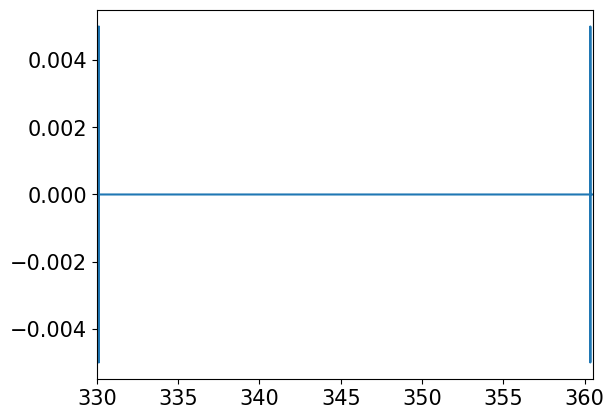

In [89]:
plt.plot(full_rec_times[:14404352], spikes_5uA.get_traces()[:,0])
plt.xlim(330,360.5)

(13504408.0, 13504500.0)

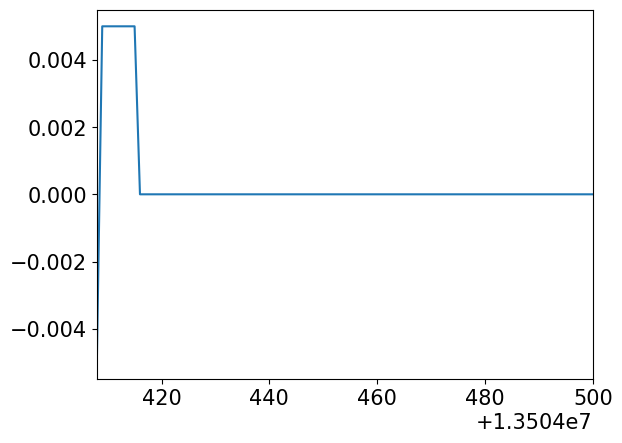

In [90]:
plt.plot(spikes_5uA.get_traces()[:,0])
#plt.xlim(0.9903635e7, .9903645e7)
#plt.xlim(1.0810371e7, 1.08104e7)
#plt.xlim(1.1700062e7, 1.17001e7)
#plt.xlim(1.2600076e7, 1.260009e7)
plt.xlim(1.3504408e7, 1.35045e7)

In [133]:
1.3504408e7

13504408.0

In [134]:
full_rec_times[13504400:13504408]

array([450.14666667, 450.1467    , 450.14673333, 450.14676667,
       450.1468    , 450.14683333, 450.14686667, 450.1469    ])

This day had 5 main bursts of stimulation as follows
1) -0.005 for 200 us @ 330.1209 \
    0.005 for 200 us @ 330.12113333
2) -0.005 for 200 us @ 360.34543333 \
    0.005 for 200 us @ 360.34663333
3) -0.005 for 200 us @ 390.00183333\
    0.005 for 200 us @ 390.00203333
4) -0.005 for 200 us @ 420.00233333\
    0.005 for 200 us @ 420.00256667
5) -0.005 for 200 us @ 450.14666667\
    0.005 for 200 us @ 450.1469

In [140]:
np.arange(1,6,1)

array([1, 2, 3, 4, 5])

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 5 uA, T = 2')

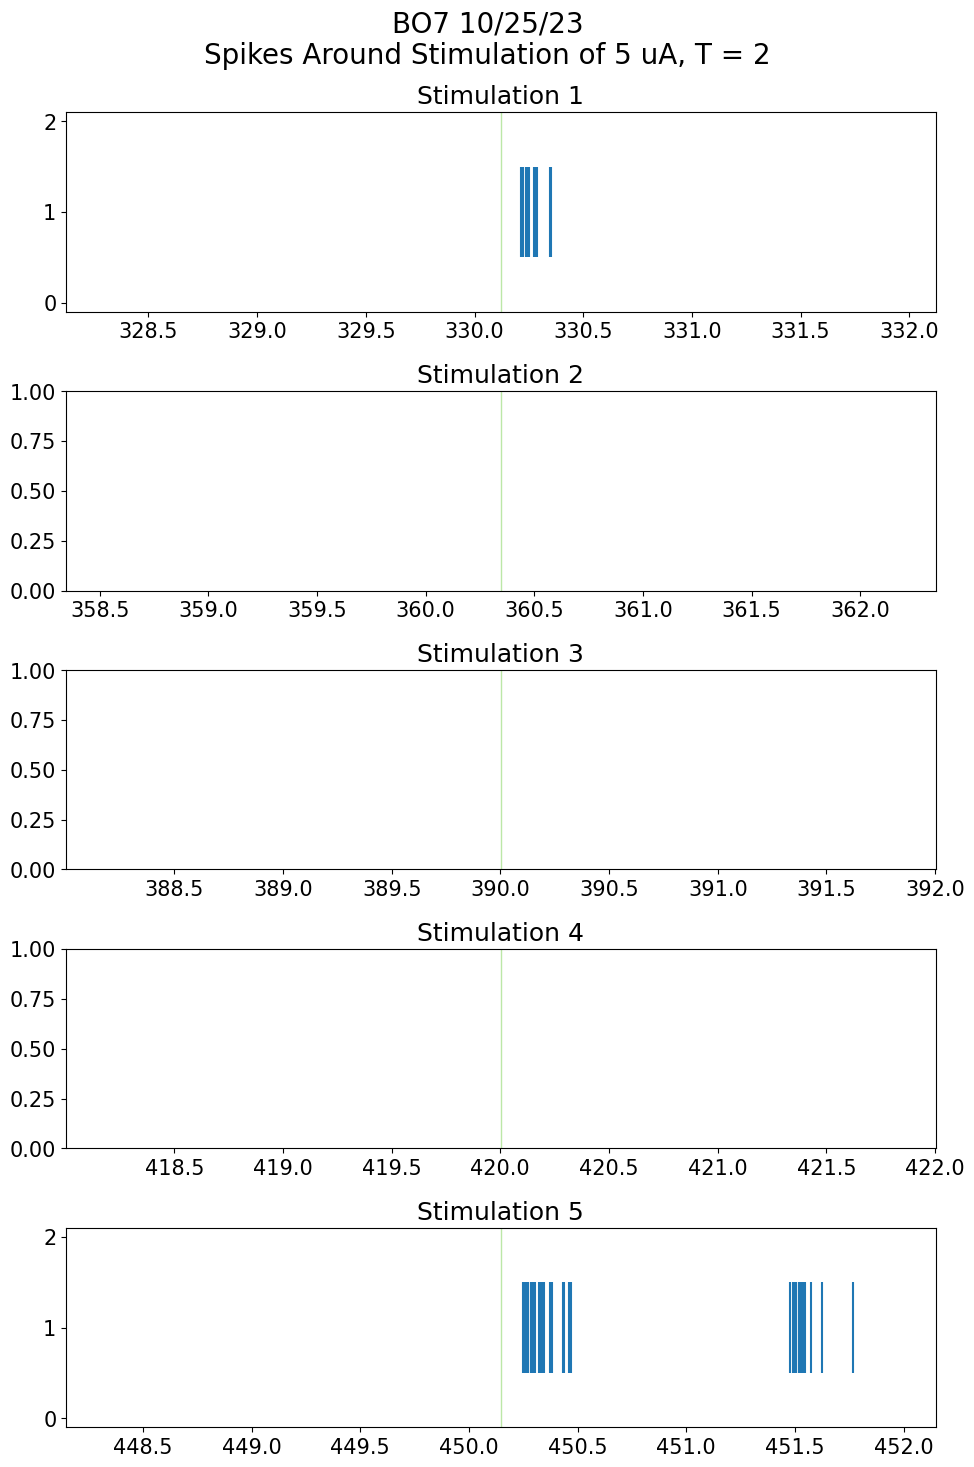

In [9]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_5ua = [(330.1209, 330.1211333), 
         (360.34543333, 360.34663333), 
         (390.00183333, 390.00203333), 
         (420.00233333, 420.00256667), 
         (450.14666667, 450.1469)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_5ua):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_5uA_sec[spiketimes_5uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 5 uA, T = {T}', fontsize=20)

## 10uA

In [10]:
spiketimes_10uA, nwb_10uA, spikes_10uA = pull_spike_data(fpath, 'BO14_240625_10uA', 'BO14W5D1_062524_10uA.nwb', 0)
spiketimes_10uA_sec = spiketimes_10uA / 30000

In [12]:
spikes_10uA.get_traces()[13504200:13504207,0]

array([ 0.  , -0.01, -0.01, -0.01, -0.01, -0.01, -0.01])

In [11]:
full_rec_times = np.arange(0, spikes_10uA.get_traces().shape[0]/30000, 1/30000)

(13504207.0, 13504220.0)

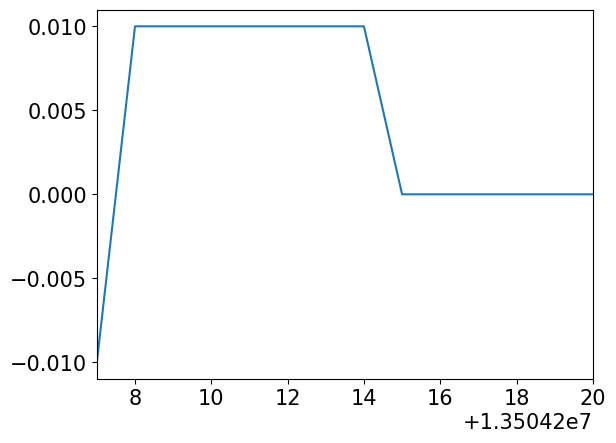

In [273]:
plt.plot(spikes_10uA.get_traces()[:,0])
#plt.xlim(0.9934575e7, 0.9934585e7)
#plt.xlim(1.0802764e7,1.080278e7)
#plt.xlim(1.1703157e7,1.170318e7)
#plt.xlim(1.2600295e7, 1.260032e7)
plt.xlim(1.3504207e7, 1.350422e7)

In [274]:
1.3504207e7

13504207.0

In [275]:
full_rec_times[13504200:13504207]

array([450.14      , 450.14003333, 450.14006667, 450.1401    ,
       450.14013333, 450.14016667, 450.1402    ])

This day had 5 main bursts of stimulation as follows
1) -0.010 for 200 us @ 331.15226667 \
    0.010 for 200 us @ 331.15246667
2) -0.010 for 200 us @ 360.0919 \
    0.010 for 200 us @ 360.0921
3) -0.010 for 200 us @ 390.105\
    0.010 for 200 us @ 390.1052
4) -0.010 for 200 us @ 420.0096\
    0.010 for 200 us @ 420.0098
5) -0.010 for 200 us @ 450.14\
    0.010 for 200 us @ 450.1402

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 10 uA, T = 2')

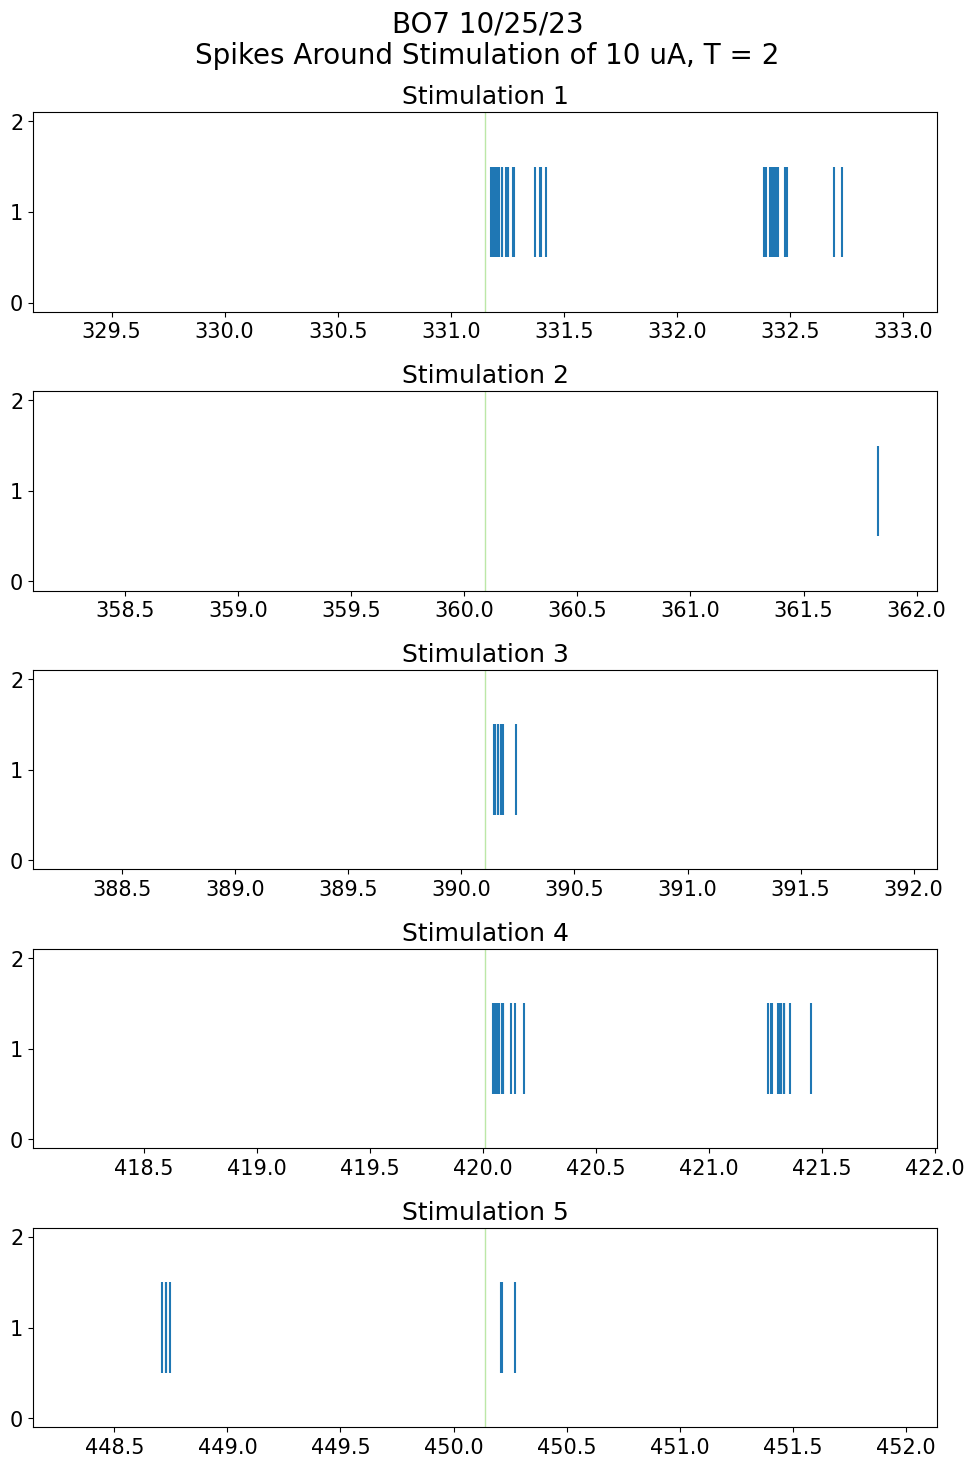

In [12]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_10uA = [(331.15226667, 331.15246667), 
         (360.0919, 360.0921), 
         (390.105, 390.1052), 
         (420.0096, 420.0098), 
         (450.14, 450.1402)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_10uA):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_10uA_sec[spiketimes_10uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 10 uA, T = {T}', fontsize=20)

## 20uA

In [13]:
spiketimes_20uA, nwb_20uA, spikes_20uA = pull_spike_data(fpath, 'BO14_240625_20uA', 'BO14W5D1_062524_20uA.nwb', 0)
spiketimes_20uA_sec = spiketimes_20uA / 30000

In [14]:
spikes_20uA.get_traces()[13481440:13481448,0]

array([ 0.  ,  0.  , -0.02, -0.02, -0.02, -0.02, -0.02, -0.02])

In [14]:
full_rec_times = np.arange(0, spikes_20uA.get_traces().shape[0]/30000, 1/30000)

(13481448.0, 13481460.0)

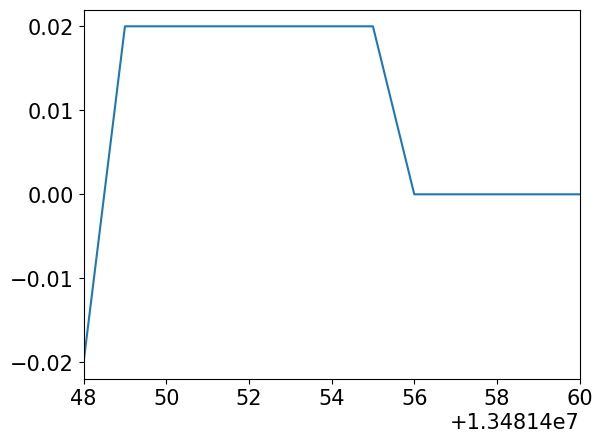

In [85]:
plt.plot(spikes_20uA.get_traces()[:,0])
#plt.xlim(0.9916693e7,0.991672e7)
#plt.xlim(1.080133e7,1.080135e7)
#plt.xlim(1.1713894e7,1.171392e7)
#plt.xlim(1.2605677e7,1.26057e7)
plt.xlim(1.3481448e7,1.348146e7)

In [86]:
1.3481448e7

13481448.0

In [87]:
full_rec_times[13481440:13481448]

array([449.38133333, 449.38136667, 449.3814    , 449.38143333,
       449.38146667, 449.3815    , 449.38153333, 449.38156667])

This day had 5 main bursts of stimulation as follows
1) -0.020 for 200 us @ 330.5562 \
    0.020 for 200 us @ 330.5564
2) -0.020 for 200 us @ 360.0441 \
    0.020 for 200 us @ 360.0443
3) -0.020 for 200 us @ 390.4629\
    0.020 for 200 us @ 390.4631
4) -0.020 for 200 us @ 420.189\
    0.020 for 200 us @ 420.1892
5) -0.020 for 200 us @ 449.38133333\
    0.020 for 200 us @ 449.38156667

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 20 uA, T = 2')

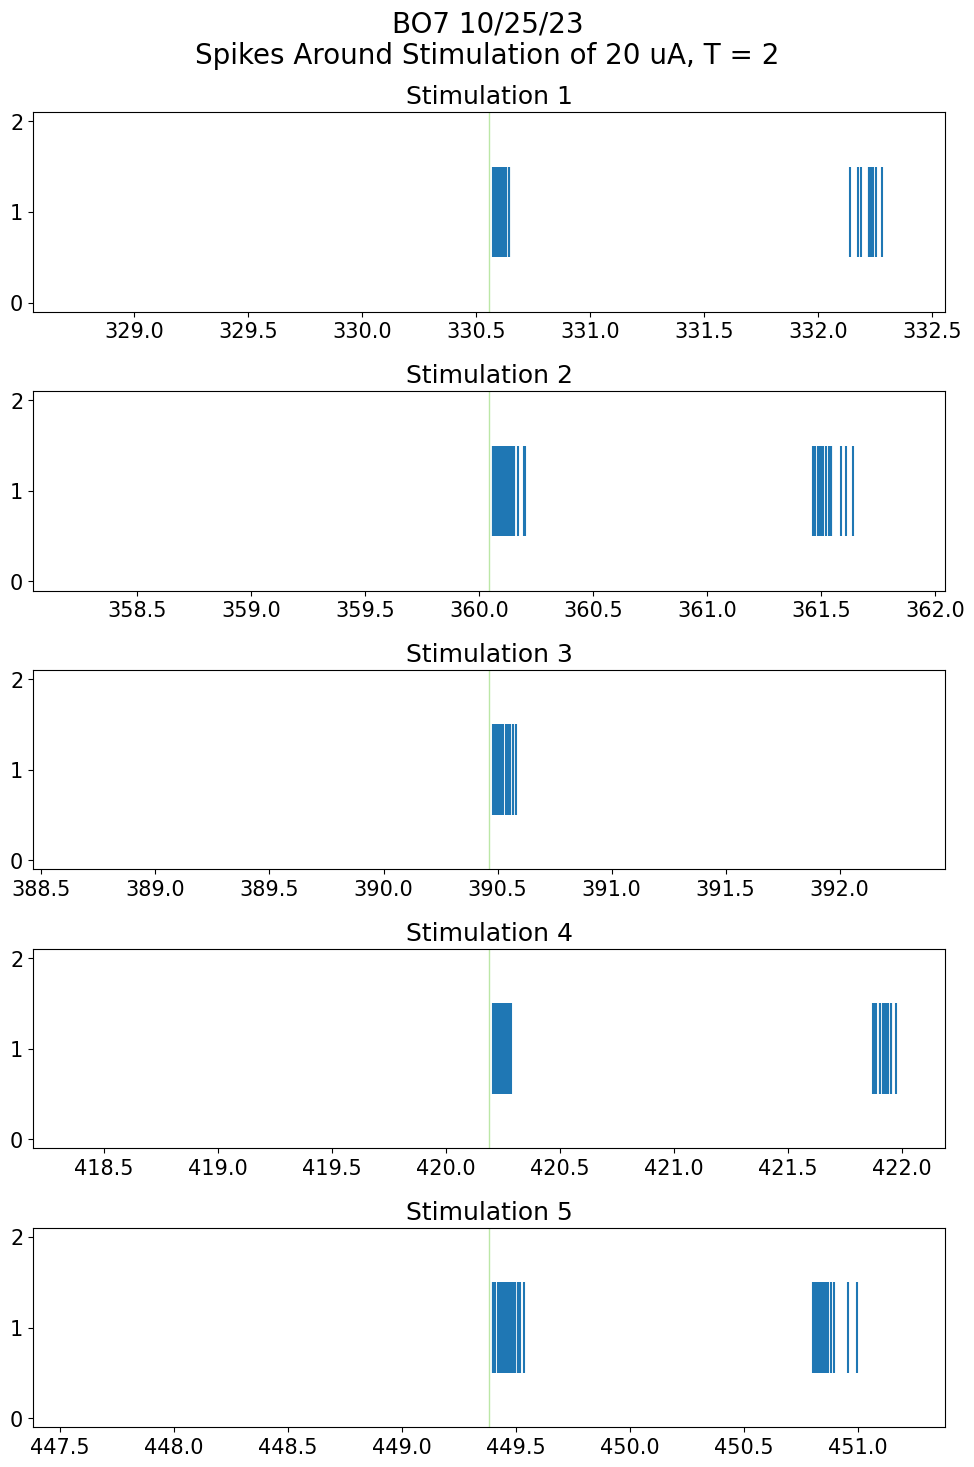

In [15]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_20uA = [(330.5562, 330.5564), 
         (360.0441, 360.0443), 
         (390.4629, 390.4631), 
         (420.189, 420.1892), 
         (449.38133333, 449.38156667)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_20uA):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_20uA_sec[spiketimes_20uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 20 uA, T = {T}', fontsize=20)

## 30uA

In [16]:
spiketimes_30uA, nwb_30uA, spikes_30uA = pull_spike_data(fpath, 'BO14_240625_30uA', 'BO14W5D1_062524_30uA.nwb', 0)
spiketimes_30uA_sec = spiketimes_30uA / 30000

In [16]:
spikes_30uA.get_traces()[13511841:13511848,0]

array([ 0.  , -0.03, -0.03, -0.03, -0.03, -0.03, -0.03])

In [17]:
full_rec_times = np.arange(0, spikes_30uA.get_traces().shape[0]/30000, 1/30000)

(13511848.0, 13511900.0)

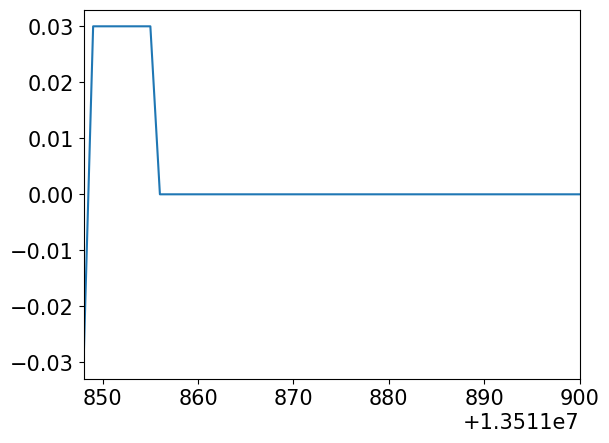

In [65]:
plt.plot(spikes_30uA.get_traces()[:,0])
#plt.xlim(0.9895003e7,0.989505e7)
#plt.xlim(1.0797651e7,1.07977e7)
#plt.xlim(1.1691273e7, 1.16913e7)
#plt.xlim(1.2609435e7, 1.26095e7)
plt.xlim(1.3511848e7, 1.35119e7)

In [67]:
1.3511848e7

13511848.0

In [68]:
full_rec_times[13511841:13511848]

array([450.3947    , 450.39473333, 450.39476667, 450.3948    ,
       450.39483333, 450.39486667, 450.3949    ])

This day had 5 main bursts of stimulation as follows
1) -0.030 for 200 us @ 329.83343333 \
    0.030 for 200 us @ 329.83363333
2) -0.030 for 200 us @ 359.92146667 \
    0.030 for 200 us @ 359.92166667
3) -0.030 for 200 us @ 389.70886667\
    0.030 for 200 us @ 389.70906667
4) -0.030 for 200 us @ 420.31426667\
    0.030 for 200 us @ 420.31446667
5) -0.030 for 200 us @ 450.3947\
    0.030 for 200 us @ 450.3949

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 30 uA, T = 2')

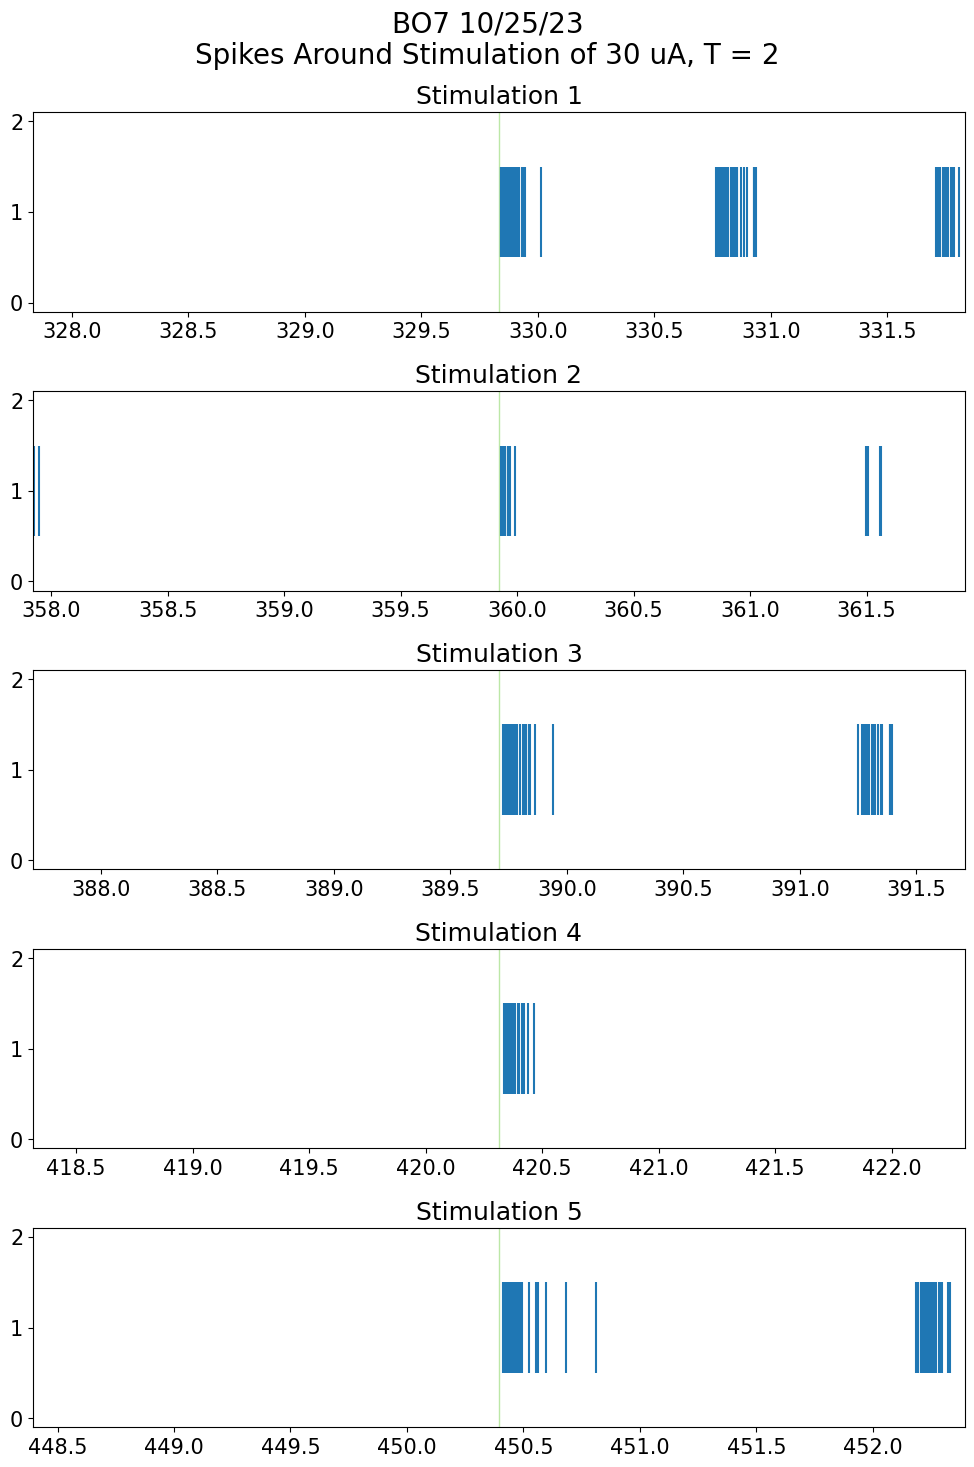

In [18]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_30uA = [(329.83343333, 329.83363333), 
         (359.92146667, 359.92166667), 
         (389.70886667, 389.70906667), 
         (420.31426667, 420.31446667), 
         (450.3947, 450.3949)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_30uA):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_30uA_sec[spiketimes_30uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 30 uA, T = {T}', fontsize=20)

## 40uA

In [19]:
spiketimes_40uA, nwb_30uA, spikes_40uA = pull_spike_data(fpath, 'BO14_240625_40uA', 'BO14W5D1_062524_40uA.nwb', 0)
spiketimes_40uA_sec = spiketimes_40uA / 30000

In [18]:
spikes_40uA.get_traces()[13505960:13505967,0]

array([ 0.  , -0.04, -0.04, -0.04, -0.04, -0.04, -0.04])

In [20]:
full_rec_times = np.arange(0, spikes_40uA.get_traces().shape[0]/30000, 1/30000)

(13505967.0, 13506000.0)

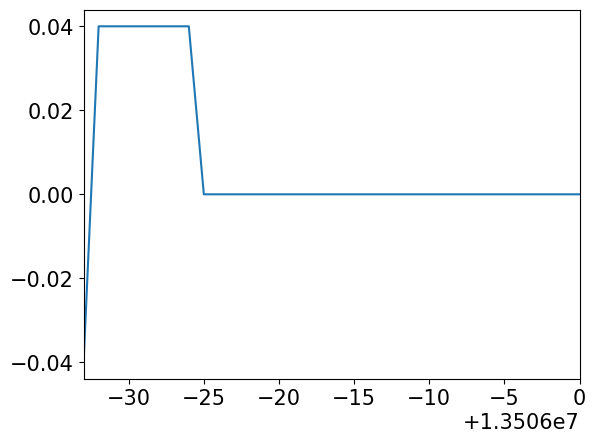

In [57]:
plt.plot(spikes_40uA.get_traces()[:,0])
#plt.xlim(0.9906784e7,0.99068e7)
#plt.xlim(1.0814988e7,1.0815e7)
#plt.xlim(1.1703449e7, 1.17035e7)
#plt.xlim(1.2597942e7,1.2598e7)
plt.xlim(1.3505967e7,1.3506e7)

In [58]:
1.3505967e7

13505967.0

In [59]:
full_rec_times[13505960:13505967]

array([450.19866667, 450.1987    , 450.19873333, 450.19876667,
       450.1988    , 450.19883333, 450.19886667])

This day had 5 main bursts of stimulation as follows
1) -0.040 for 200 us @ 330.2259\
    0.040 for 200 us @ 330.2261
2) -0.040 for 200 us @ 360.49936667\
    0.040 for 200 us @ 360.49956667
3) -0.040 for 200 us @ 390.11473333\
    0.040 for 200 us @ 390.11493333
4) -0.040 for 200 us @ 419.93116667\
    0.040 for 200 us @ 419.93136667
5) -0.040 for 200 us @ 450.19866667\
    0.040 for 200 us @ 450.19886667

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 40 uA, T = 2')

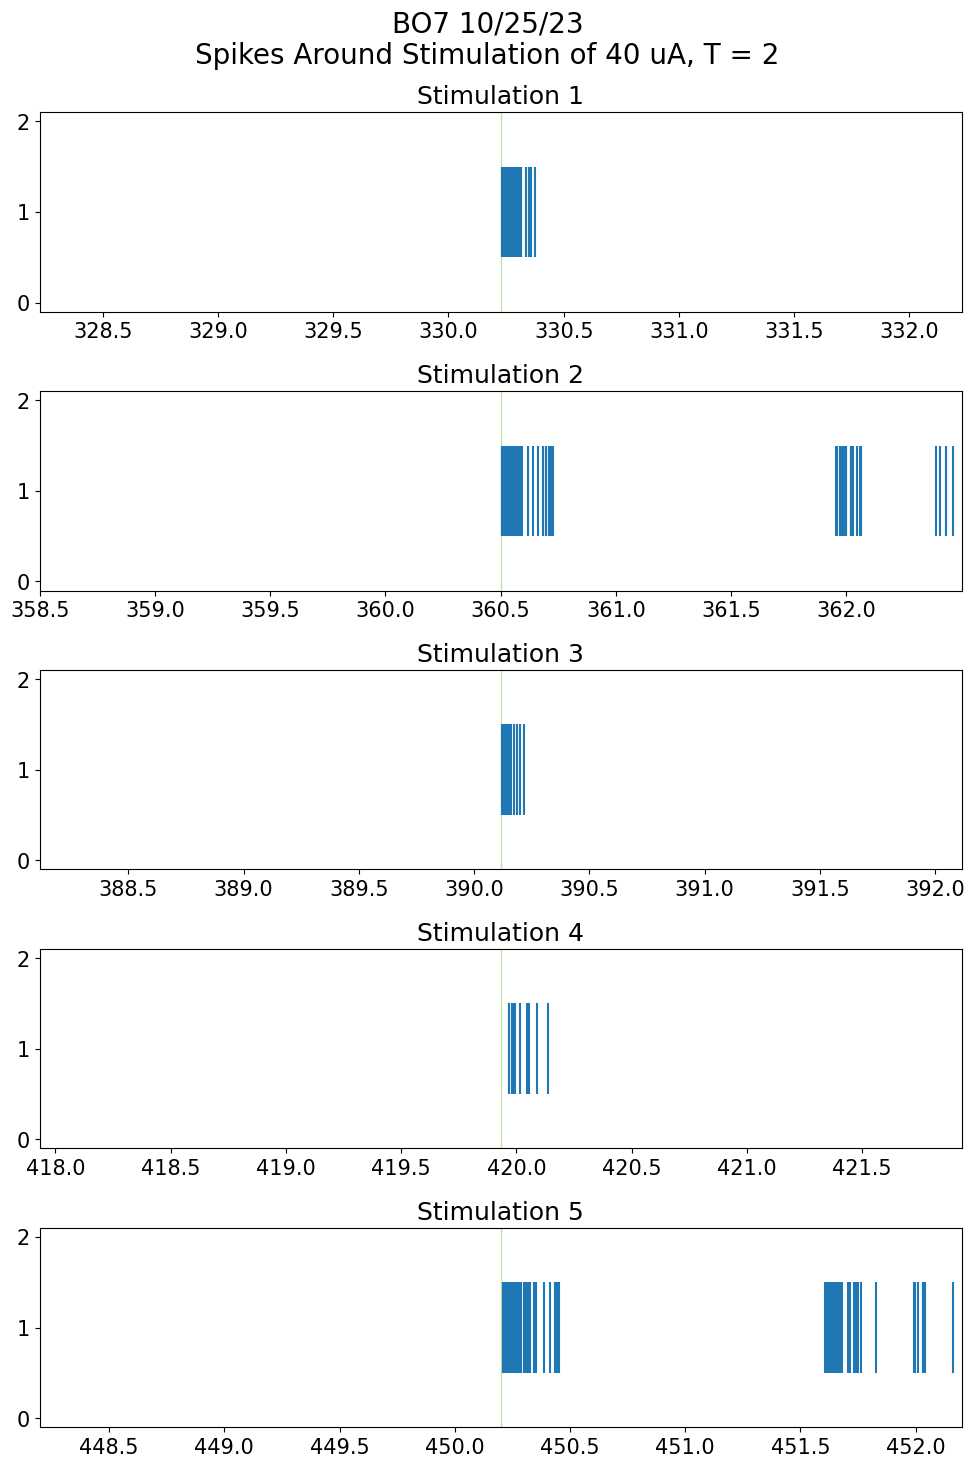

In [21]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_40uA = [(330.2259, 330.2261), 
         (360.49936667, 360.49956667), 
         (390.11473333, 390.11493333), 
         (419.93116667, 419.93136667), 
         (450.19866667, 450.19886667)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_40uA):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_40uA_sec[spiketimes_40uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 40 uA, T = {T}', fontsize=20)

## 50uA

In [22]:
spiketimes_50uA, nwb_50uA, spikes_50uA = pull_spike_data(fpath, 'BO14_240625_50uA', 'BO14W5D1_062524_50uA.nwb', 0)
spiketimes_50uA_sec = spiketimes_50uA / 30000

In [20]:
spikes_50uA.get_traces()[13505456:13505463,0]

array([ 0.  , -0.05, -0.05, -0.05, -0.05, -0.05, -0.05])

In [23]:
full_rec_times = np.arange(0, spikes_50uA.get_traces().shape[0]/30000, 1/30000)

(13505463.0, 13505480.0)

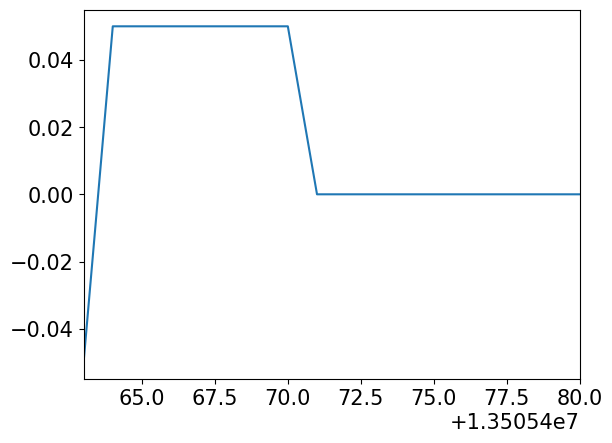

In [151]:
plt.plot(spikes_50uA.get_traces()[:,0])
#plt.xlim(0.99071e7, 0.990711e7)
#plt.xlim(1.0813344e7, 1.081336e7)
#plt.xlim(1.1703279e7,1.17033e7)
#plt.xlim(1.2610966e7, 1.2611e7)
plt.xlim(1.3505463e7, 1.350548e7)

In [152]:
1.3505463e7

13505463.0

In [155]:
full_rec_times[13505456:13505463]

array([450.18186667, 450.1819    , 450.18193333, 450.18196667,
       450.182     , 450.18203333, 450.18206667])

This day had 5 main bursts of stimulation as follows
1) -0.050 for 200 us @ 330.23643333\
    0.050 for 200 us @ 330.23663333
2) -0.050 for 200 us @ 360.44456667\
    0.050 for 200 us @ 360.44476667
3) -0.050 for 200 us @ 390.10906667\
    0.050 for 200 us @ 390.10926667
4) -0.050 for 200 us @ 420.3653\
    0.050 for 200 us @ 420.3655
5) -0.050 for 200 us @ 450.18186667\
    0.050 for 200 us @ 450.18206667

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 50 uA, T = 2')

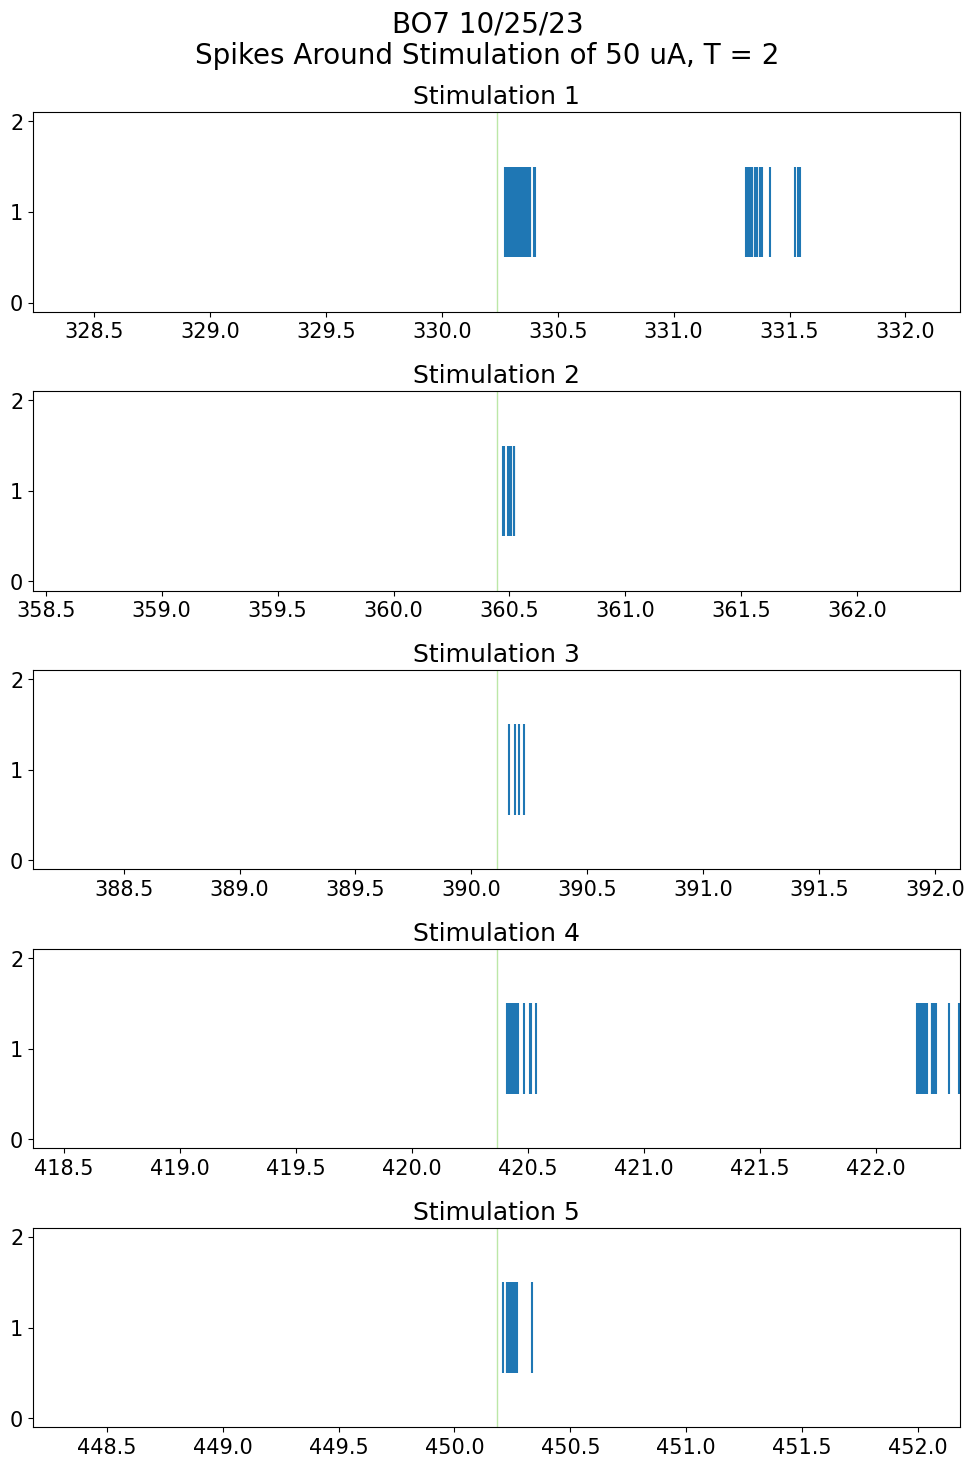

In [24]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_50uA = [(330.23643333, 330.23663333), 
         (360.44456667, 360.44476667), 
         (390.10906667, 390.10926667), 
         (420.3653, 420.3655), 
         (450.18186667, 450.18206667)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_50uA):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_50uA_sec[spiketimes_50uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 50 uA, T = {T}', fontsize=20)

## 60 uA

In [25]:
spiketimes_60uA, nwb_60uA, spikes_60uA = pull_spike_data(fpath, 'BO14_240625_60uA', 'BO14W5D1_062524_60uA.nwb', 0)
spiketimes_60uA_sec = spiketimes_60uA / 30000

In [22]:
spikes_60uA.get_traces()[13502136:13502143,0]

array([ 0.  , -0.06, -0.06, -0.06, -0.06, -0.06, -0.06])

In [26]:
full_rec_times = np.arange(0, spikes_60uA.get_traces().shape[0]/30000, 1/30000)

(13502136.0, 13502160.0)

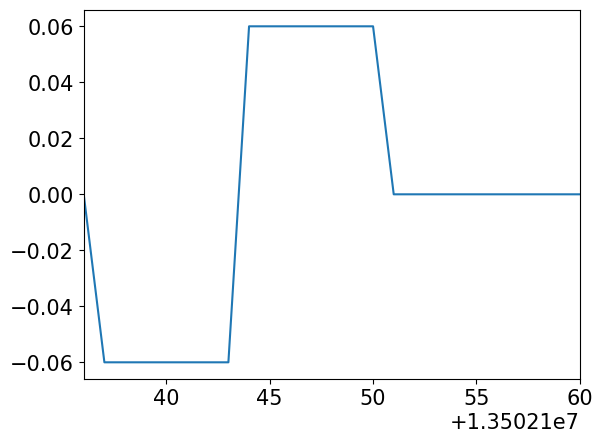

In [80]:
plt.plot(spikes_60uA.get_traces()[:,0])
#plt.xlim(0.9977427e7, 0.997744e7)
#plt.xlim(1.0801869e7, 1.08019e7)
#plt.xlim(1.1701854e7, 1.170187e7)
#plt.xlim(1.2581545e7, 1.258156e7)
plt.xlim(1.3502136e7, 1.350216e7)

In [81]:
1.3502136e7

13502136.0

In [82]:
full_rec_times[13502136:13502143]

array([450.0712    , 450.07123333, 450.07126667, 450.0713    ,
       450.07133333, 450.07136667, 450.0714    ])

This day had 5 main bursts of stimulation as follows
1) -0.060 for 200 us @ 332.58066667\
    0.060 for 200 us @ 332.58086667
2) -0.060 for 200 us @ 360.06206667\
    0.060 for 200 us @ 360.06226667
3) -0.060 for 200 us @ 390.06156667\
    0.060 for 200 us @ 390.06176667
4) -0.060 for 200 us @ 419.3846\
    0.060 for 200 us @ 419.3848
5) -0.060 for 200 us @ 450.0712\
    0.060 for 200 us @ 450.0714

Text(0.5, 0.98, 'BO7 10/25/23\nSpikes Around Stimulation of 60 uA, T = 2')

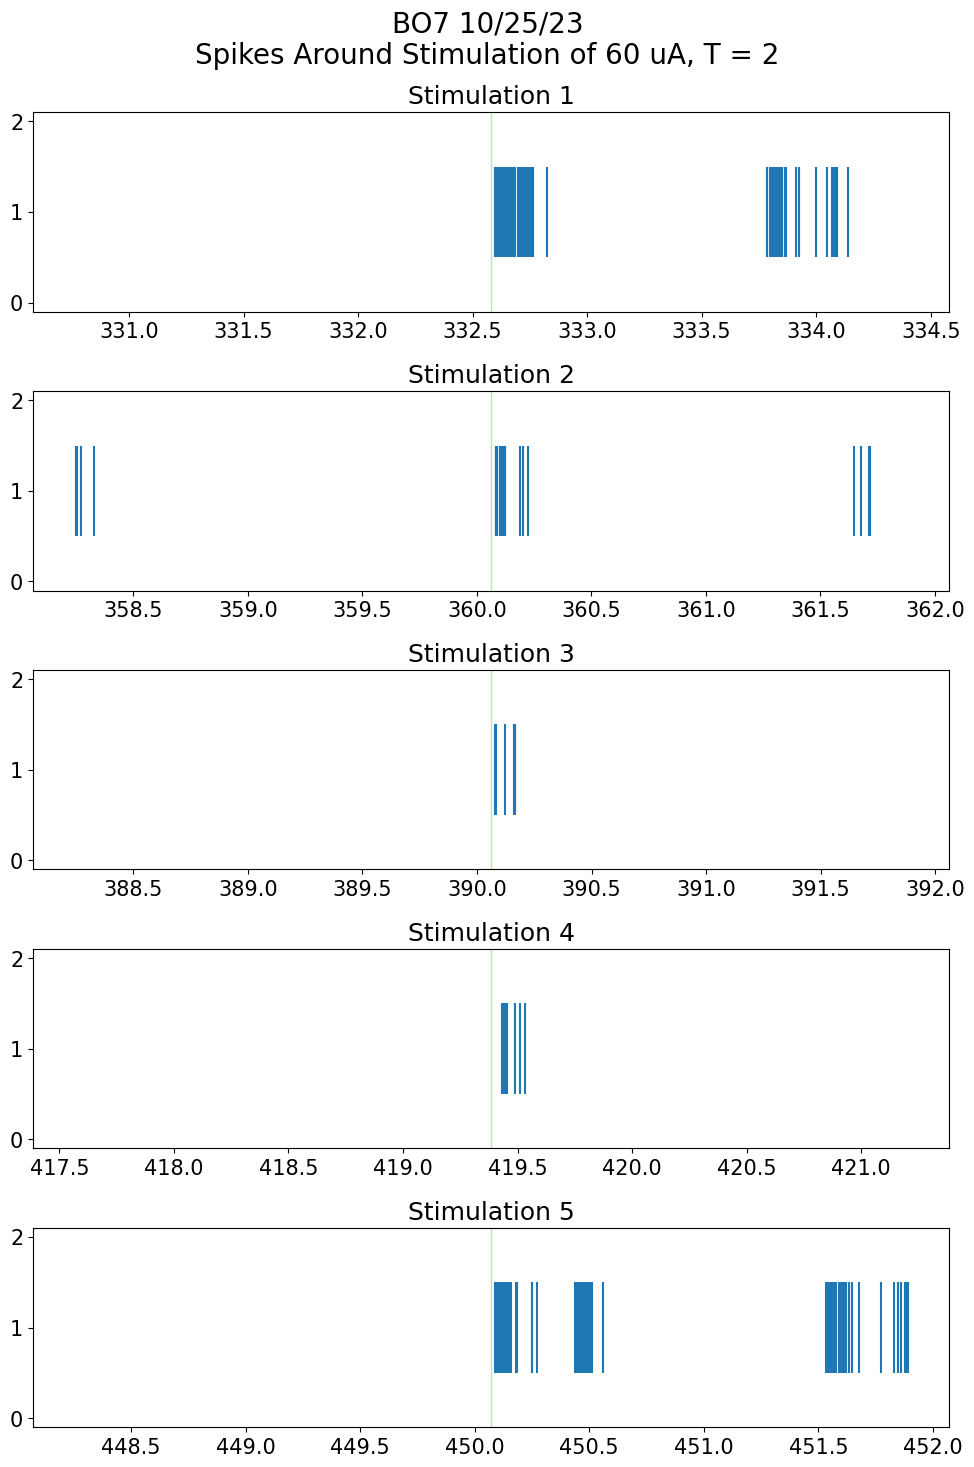

In [27]:
T = 2 # time in seconds before/after stim to look at

''' 1) convert spike times from frameno to time in seconds '''

''' 2) plot window for each stimulation '''
fig, ax = plt.subplots(5,1, figsize=(10,15), layout='tight')

#(pulse neg start, pulse pos start)
stims_60uA = [(332.58066667, 332.58086667), 
         (360.06206667, 360.06226667), 
         (390.06156667, 390.06176667), 
         (419.3846, 419.3848), 
         (450.0712, 450.0714)]
for i, (p1_start, p2_start) in zip(np.arange(5), stims_60uA):
    stim_start = p1_start
    stim_end = p2_start + 0.0002 

    stim_window_spikes = spiketimes_60uA_sec[spiketimes_60uA_sec > stim_start - T]
    stim_window_spikes = stim_window_spikes[stim_window_spikes < stim_end + T]

    ax[i].eventplot(stim_window_spikes)
    ax[i].axvspan(stim_start, stim_end, color=viridis(0.8), alpha=0.5)
    #ax[i].text(329, 1, 'Stimulation')
    ax[i].set_xlim(stim_start - T, stim_end + T)
    ax[i].set_title(f'Stimulation {i+1}')


fig.suptitle(f'BO7 10/25/23\nSpikes Around Stimulation of 60 uA, T = {T}', fontsize=20)

## Summary

In [28]:
spiketimes_sec = [spiketimes_5uA_sec, spiketimes_10uA_sec, spiketimes_20uA_sec, spiketimes_30uA_sec, spiketimes_40uA_sec, spiketimes_50uA_sec, spiketimes_60uA_sec]
stim_times = [stims_5ua, stims_10uA, stims_20uA, stims_30uA, 
                   stims_40uA, stims_50uA, stims_60uA]

T = 2
num_spikes_pre_post_all = []

for spiketimes, stimtime in zip(spiketimes_sec, stim_times):
    num_spikes_pre_post = np.array([])

    for stim in stimtime:
        start = stim[0] - T
        end = stim[1] + 0.0002 + T

        pre = spiketimes[spiketimes > start]
        pre = pre[pre < stim[0]]
        post = spiketimes[spiketimes < end]
        post = post[post > stim[1]]

        if(stim == stimtime[0]):
            num_spikes_pre_post = np.array([len(pre), len(post)])
        else:
            num_spikes_pre_post = np.vstack((num_spikes_pre_post, [len(pre), len(post)]))
    num_spikes_pre_post_all.append(num_spikes_pre_post)

#output: list of array for each stim containing num spikes pre-stim, num spikes post-stim for each time of stim
    
num_spikes_pre_post_all

[array([[ 0, 11],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0, 45]]),
 array([[ 0, 38],
        [ 0,  1],
        [ 0,  8],
        [ 0, 26],
        [ 4,  3]]),
 array([[ 0, 28],
        [ 0, 56],
        [ 0, 18],
        [ 0, 43],
        [ 0, 68]]),
 array([[  0, 103],
        [  2,  15],
        [  0,  53],
        [  0,  30],
        [  0,  64]]),
 array([[ 0, 40],
        [ 0, 79],
        [ 0, 18],
        [ 0, 11],
        [ 0, 87]]),
 array([[ 0, 68],
        [ 0,  8],
        [ 0,  4],
        [ 0, 32],
        [ 0, 15]]),
 array([[ 0, 94],
        [ 5, 23],
        [ 0,  6],
        [ 0,  8],
        [ 0, 82]])]

In [36]:
# get diffs
first_stim_diffs = []
second_stim_diffs = []
third_stim_diffs = []
fourth_stim_diffs = []
fifth_stim_diffs = []

amp_vals = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

for prepostarr, amp_val in zip(num_spikes_pre_post_all, amp_vals):
    stim1 = prepostarr[0]
    stim2 = prepostarr[1]
    stim3 = prepostarr[2]
    stim4 = prepostarr[3]
    stim5 = prepostarr[4]

    diff1 = (stim1[1]/2) - (stim1[0]/2) # post - pre ~ growth from stim
    diff2 = (stim2[1]/2) - (stim2[0]/2)
    diff3 = (stim3[1]/2) - (stim3[0]/2)
    diff4 = (stim4[1]/2) - (stim4[0]/2)
    diff5 = (stim5[1]/2) - (stim5[0]/2)

    #print(f'diff1: {diff1}\tdiff2: {diff2}\tdiff3: {diff3}\tdiff4: {diff4}\tdiff5: {diff5}')
    first_stim_diffs.append(diff1)
    second_stim_diffs.append(diff2)
    third_stim_diffs.append(diff3)
    fourth_stim_diffs.append(diff4)
    fifth_stim_diffs.append(diff5)

print(first_stim_diffs)
print(second_stim_diffs)
print(third_stim_diffs)
print(fourth_stim_diffs)
print(fifth_stim_diffs)
        

[5.5, 19.0, 14.0, 51.5, 20.0, 34.0, 47.0]
[0.0, 0.5, 28.0, 6.5, 39.5, 4.0, 9.0]
[0.0, 4.0, 9.0, 26.5, 9.0, 2.0, 3.0]
[0.0, 13.0, 21.5, 15.0, 5.5, 16.0, 4.0]
[22.5, -0.5, 34.0, 32.0, 43.5, 7.5, 41.0]


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

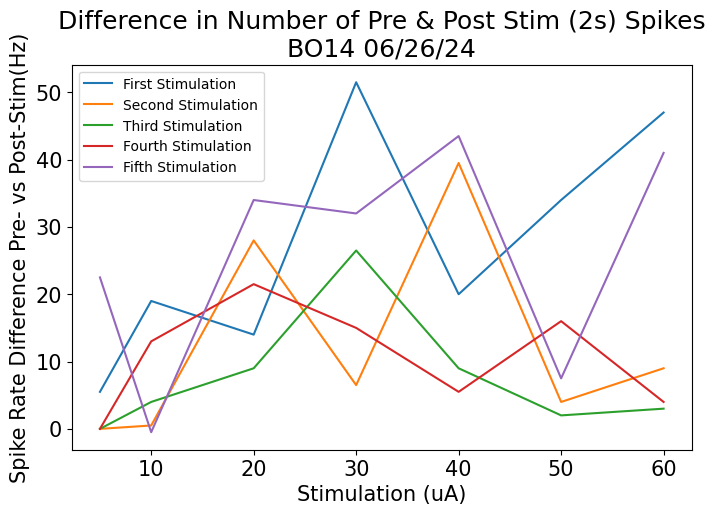

In [44]:
stims = [5,10,20,30,40,50,60]
plt.figure(figsize = (8,5))

plt.plot(stims, first_stim_diffs, label='First Stimulation')
plt.plot(stims, second_stim_diffs, label='Second Stimulation')
plt.plot(stims, third_stim_diffs, label='Third Stimulation')
plt.plot(stims, fourth_stim_diffs, label='Fourth Stimulation')
plt.plot(stims, fifth_stim_diffs, label='Fifth Stimulation')

plt.title('Difference in Number of Pre & Post Stim (2s) Spikes\nBO14 06/26/24')
plt.xlabel('Stimulation (uA)')
plt.ylabel('Spike Rate Difference Pre- vs Post-Stim(Hz)')

plt.legend(fontsize=10)

In [38]:
stim_diffs = [first_stim_diffs, second_stim_diffs, third_stim_diffs, fourth_stim_diffs, fifth_stim_diffs]

i=0
alldata = []
for stim_diff in stim_diffs:
    sweep_vals = [5, 10, 20, 30, 40, 50, 60]
    da = xr.DataArray(stim_diff, coords=[sweep_vals], dims=['sweep_value'])
    da['stimulation'] = i + 1
    alldata.append(da)

    i += 1

total_da = xr.concat(alldata, 'stimulation')
total_da



<xarray.DataArray (stimulation: 5, sweep_value: 7)> Size: 280B
array([[ 5.5, 19. , 14. , 51.5, 20. , 34. , 47. ],
       [ 0. ,  0.5, 28. ,  6.5, 39.5,  4. ,  9. ],
       [ 0. ,  4. ,  9. , 26.5,  9. ,  2. ,  3. ],
       [ 0. , 13. , 21.5, 15. ,  5.5, 16. ,  4. ],
       [22.5, -0.5, 34. , 32. , 43.5,  7.5, 41. ]])
Coordinates:
  * sweep_value  (sweep_value) int64 56B 5 10 20 30 40 50 60
  * stimulation  (stimulation) int64 40B 1 2 3 4 5

Text(0.5, 1.0, 'Avg Diff in Number of Pre & Post Stim (2s) Spikes\nAcross Stimulations (n=5)\nBO14 06/26/24')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

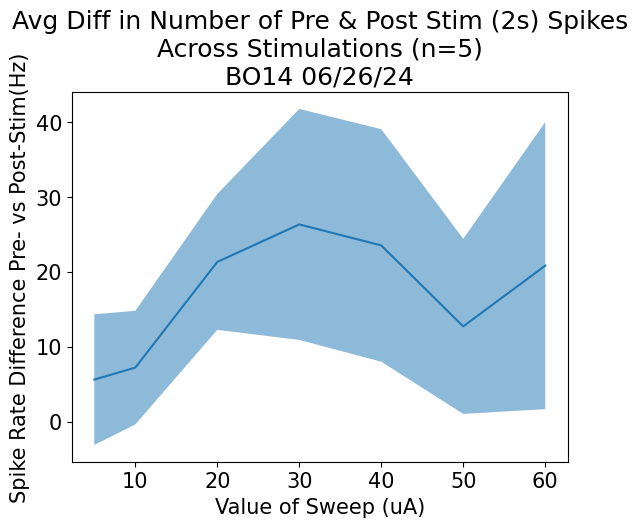

In [42]:
mean = total_da.mean(dim='stimulation')
std = total_da.std(dim='stimulation')

plt.plot(total_da['sweep_value'].values, mean)
plt.fill_between(total_da['sweep_value'].values, mean+std, mean-std, alpha=0.5, linewidth=0)
plt.xlabel('Value of Sweep (uA)')
plt.ylabel('Spike Rate Difference Pre- vs Post-Stim(Hz)')
plt.title('Avg Diff in Number of Pre & Post Stim (2s) Spikes\nAcross Stimulations (n=5)\nBO14 06/26/24')

In [40]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

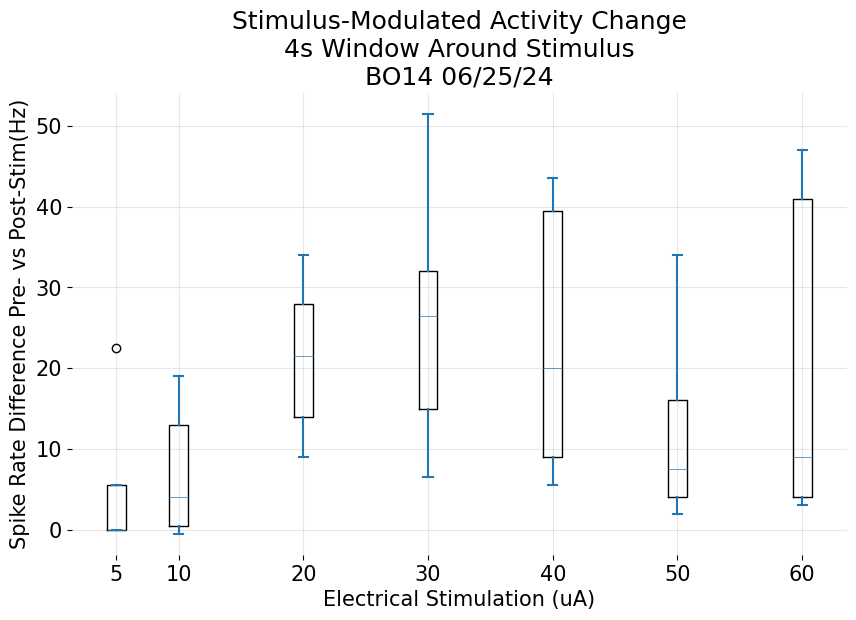

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.boxplot([total_da.sel(sweep_value=5), total_da.sel(sweep_value=10), total_da.sel(sweep_value=20), total_da.sel(sweep_value=30), total_da.sel(sweep_value=40), total_da.sel(sweep_value=50), total_da.sel(sweep_value=60)], 
           positions=[5, 10, 20, 30, 40, 50, 60], widths=1.5,
            medianprops={"color": "C0", "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
ax.set_title('Stimulus-Modulated Activity Change\n4s Window Around Stimulus\nBO14 06/25/24')
ax.set_xlabel('Electrical Stimulation (uA)')
ax.set_ylabel('Spike Rate Difference Pre- vs Post-Stim(Hz)')

ax.grid(True,which='major',axis='both',alpha=0.3)